# Linear Regression

### Simple linear Regression

In this task we will use linear regression and predict percentage of a student scored on basis of number of hours they studied.It involves only two variables.


In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
#importing Dataset
score=pd.read_csv(r"C:\Users\Akshay Yadav\Downloads\Internship\Task 1.csv")
score.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
#Summary
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [40]:
#Checking type of data
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

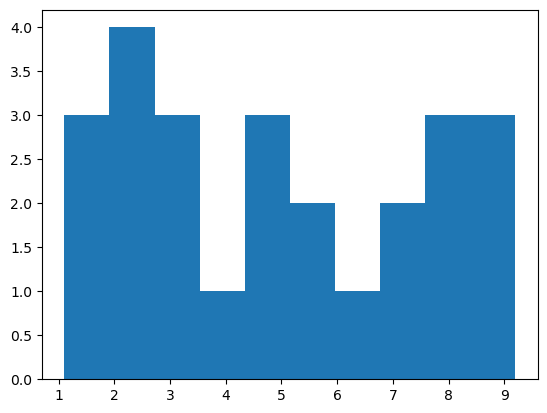

In [41]:
#Histogram
plt.hist(score['Hours'])

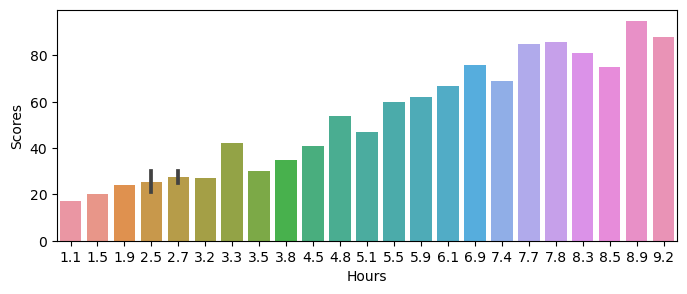

In [42]:
f, ax = plt.subplots(figsize=(8,3))
sns.barplot(x='Hours', y="Scores",  data=score);

#Observation: We can observe that as study hour increases the score of the student also increases significantly.

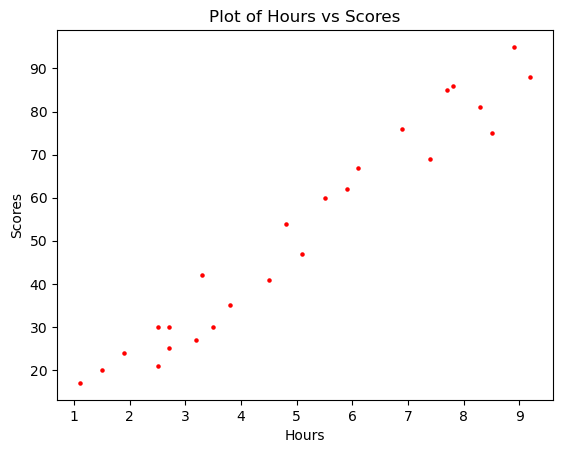

In [43]:
score.plot.scatter(x = 'Hours', y = 'Scores', s = 5, c='red')
plt.title('Plot of Hours vs Scores')
plt.show()

#Observation: We can clearly see there is a HIGH POSITIVE CORRELATION between no of hours and scores.

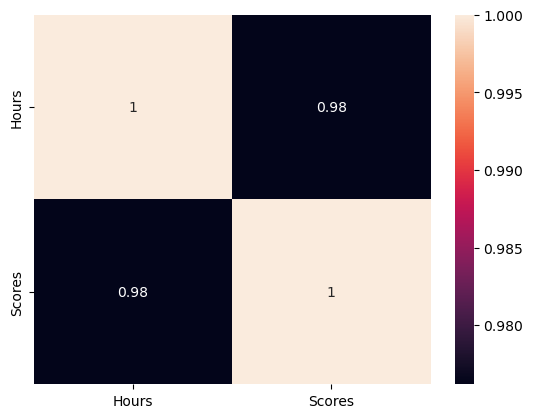

In [44]:
#Checking Correlation
sns.heatmap(score.corr(), annot=True);

#score.corr() or you can use this to find correlation

### Preparing Data

In [45]:
X=score.iloc[:,:-1].values 
y=score.iloc[:,1].values 
    
#-1 means we are selecting last column of the dataframe
#1 means we are selecting second column of the dataframe

### Model Training

In [46]:
SEED=42

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                    test_size=0.2,random_state=42)

print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

Train set: (20, 1) (20,)
Test set: (5, 1) (5,)


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

#Observation: NO error is shown means regressor found this is the best fitting line.

2.826892353899737
[9.68207815]


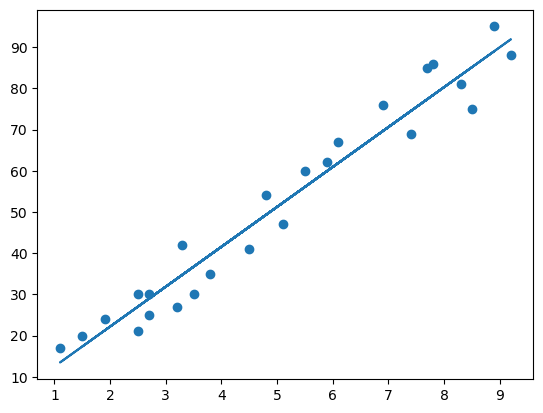

In [49]:
# Plot the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

In [50]:
y_pred = regressor.predict(X_test)
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [51]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
score

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [55]:
score = regressor.predict([[9.5]])
print(score) 

#Observation: If student studies for 9.5hours then he can score 94.80 %

[94.80663482]


### Evaluate model

In [56]:
#Importing Library
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
#Mean absolute error (Value closer to Zero better)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 3.92


In [59]:
#Mean Squared Error  (the smaller, or closer to 0, the better )
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 18.94


In [61]:
#Root Mean Squared Error (In this 4.35 is added to the actual value and error is less compared to the size of the data, value closer to Zero better)
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 4.35
